In [1]:
#%%
# importando pandas, numpy y matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import seaborn
seaborn.set()

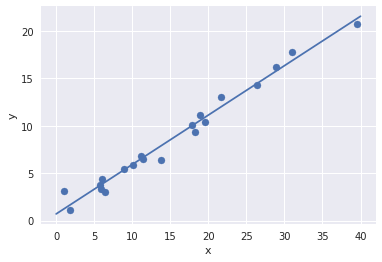

In [2]:
#%%
def plot_linear_regression():
    a = 0.5
    b = 1.0

    x = 40 * np.random.random(20)

    y = a * x + b + np.random.normal(size=x.shape)

    clasificador_lineal = LinearRegression()
    clasificador_lineal.fit(x[:, None], y)

    x_new = np.linspace(0, 40, 100)
    y_new = clasificador_lineal.predict(x_new[:, None])

    ax = plt.axes()
    ax.scatter(x, y)
    ax.plot(x_new, y_new)

    ax.set_xlabel('x')
    ax.set_ylabel('y')

    ax.axis('tight')
    
plot_linear_regression()
plt.show()

In [3]:
#%%
# importando los datasets de sklearn
from sklearn import datasets
boston = datasets.load_boston()


In [4]:
#%%
print(boston.data.shape)
print(boston.data)

(506, 13)
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [5]:
#%%
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [6]:
#%%
# estructura de nuestro dataset que leemos con pandas
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['TARGET'] = boston.target
boston_df.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
#%%
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:
#%%
from sklearn.linear_model import LinearRegression
modelo = LinearRegression(normalize=True)

In [9]:

#%%
##Utilizar el paquete sklearn.model_selection
from sklearn.model_selection import train_test_split

print('Modelo',modelo)

# Entrenar el modelo usando los conjuntos de entrenamiento
modelo.fit(boston.data, boston.target)
 
# Puntuación de la varianza: 1 es la predicción perfecta 
puntuacion = modelo.score(boston.data, boston.target)
print('Puntuacion 1:',puntuacion)


# Dividir los datos en conjuntos de entrenamiento / prueba 
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)

# Entrenar el modelo usando los conjuntos de entrenamiento
# Para entrenar el modelo hay que llamar al método fit del objeto LinearRegression
modelo.fit(X_train, y_train)

puntuacion = modelo.score(X_test, y_test)
print('Puntuacion 2:',puntuacion)

Modelo LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
Puntuacion 1: 0.7406077428649428
Puntuacion 2: 0.7241284983111713


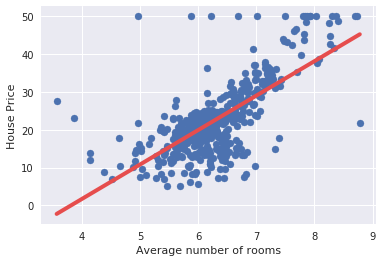

In [10]:
#%%
list(zip(boston.feature_names, modelo.coef_))

#%%
x = boston.data[:, 5]
x = np.transpose(np.atleast_2d(x))
y = boston.target

lr = LinearRegression(fit_intercept=True)

lr.fit(x, y)

fig,ax = plt.subplots()
ax.set_xlabel("Average number of rooms")
ax.set_ylabel("House Price")
ax.scatter(boston.data[:, 5], boston.target)
xmin = x.min()
xmax = x.max()
ax.plot(
    [xmin, xmax], 
    lr.predict([[xmin], [xmax]]), 
    '-',
    color=(.9,.3,.3),
    lw=4
)
plt.show()

In [11]:

#%%
lr.predict([[xmin], [xmax]])

array([-2.25801069, 45.24589608])

In [12]:
#%%
[[xmin], [xmax]]

[[3.561], [8.78]]

In [13]:
#%%
X_test[0]

array([  2.3004,   0.    ,  19.58  ,   0.    ,   0.605 ,   6.319 ,
        96.1   ,   2.1   ,   5.    , 403.    ,  14.7   , 297.09  ,
        11.1   ])

In [14]:
#%%
lr.predict(x[0:12])

array([25.17574577, 23.77402099, 30.72803225, 29.02593787, 30.38215211,
       23.85593997, 20.05125842, 21.50759586, 16.5833549 , 19.97844155,
       23.3735282 , 20.02395209])

In [15]:
#%%
from sklearn import cross_validation

#%%
folds = 5
lr.fit(X_train, y_train)
cv = cross_validation.KFold(
    X_train.shape[0], 
    folds, 
    shuffle=True, 
    random_state=33
)
scores = cross_validation.cross_val_score(
    lr, 
    X_train, 
    y_train, 
    cv=cv
)

/home/juliotorres/miniconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
scores

array([0.54918484, 0.67368688, 0.80333274, 0.70446051, 0.67261284])

In [18]:
X_train[0]

array([5.1880e-02, 0.0000e+00, 4.4900e+00, 0.0000e+00, 4.4900e-01,
       6.0150e+00, 4.5100e+01, 4.4272e+00, 3.0000e+00, 2.4700e+02,
       1.8500e+01, 3.9599e+02, 1.2860e+01])

In [19]:
#%%
y_train[0]

22.5

In [20]:
#%%
lr.predict(X_train[19:20])

array([29.19301044])

In [21]:
#%%
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
